# Crear box plots las Variaciones por fase en Espanha

In [2]:
suppressMessages(library(ggplot2))

In [3]:
setwd("~/Repositories/AirQualityCOVID/")

In [4]:
suppressMessages(library(repr))
options(repr.plot.width=13,
        repr.plot.height=5,
        #repr.plot.pointsize=50,
        repr.plot.family='serif'
       )

In [5]:
data.change <- read.csv("data/Analisis/Variacion/variacion_media_municipios.csv",
                        stringsAsFactor=F)

In [6]:
data.change <- data.change[-which(data.change$site == "Las Palmas de Gran Canaria" &
                                  data.change$variable == "pm2.5"),]

In [7]:
head(data.change)

,period,site,variable,mean.2013.2019..vs.mean.2020.,std.2013.2019..vs.std.2020.
,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,pre.lckdwn,Alcal de Henares,no,-2.797702,32.38522
2,lckdwn,Alcal de Henares,no,-72.813226,14.51649
3,fases,Alcal de Henares,no,-57.458776,11.13941
4,normalidad,Alcal de Henares,no,-37.068354,24.48542
5,new.lockdown,Alcal de Henares,no,-58.402431,20.12833
6,pre.lckdwn,Alcal de Henares,no2,-3.960033,18.63268


In [8]:
data.change$period <- factor(data.change$period,
                               levels = c("pre.lckdwn",
                                          "lckdwn",
                                          "fases",
                                          "normalidad",
                                          "new.lockdown"
                                         ))

In [9]:
a <- ggplot(data=data.change, aes(x=period, 
                             y=mean.2013.2019..vs.mean.2020.,
                             fill=period)) +
       geom_boxplot() + 
facet_wrap(~variable, , scales = "free_y")

```R
ggsave(filename="Boxplot.png",                                                                                                                                                                                        
       plot=a,                                                                                                                                                                                                              
       device="png",                                                                                                                                                                                                              
       path="Plots/Analisis/Variacion/",                                                                                                                                                                                                          
       width=13,                                                                                                                                                                                                                  
       height=5, dpi=100                                                                                                                                                                                                         
       )
```

Warning message:
"Removed 6 rows containing non-finite values (stat_boxplot)."


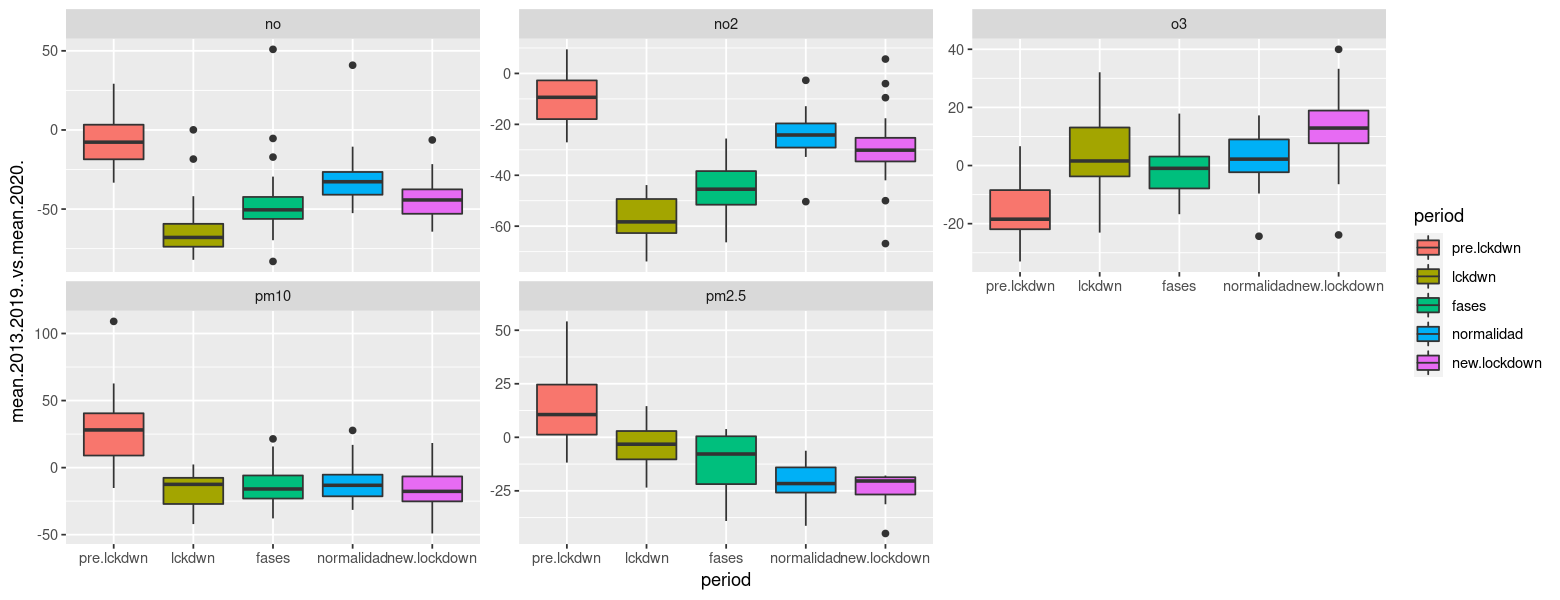

In [10]:
a

# Outliers

In [11]:
all.outliers <- data.frame()

for (pll in levels(as.factor(data.change$variable)))
for (pd in levels(as.factor(data.change$period))) {
    outliers <- boxplot.stats(data.change[data.change$variable == pll &
                                          data.change$period == pd, 
                                          "mean.2013.2019..vs.mean.2020."])$out
    
    all.outliers <- rbind(all.outliers,
                          data.change[data.change$"mean.2013.2019..vs.mean.2020." %in% outliers,])
}


In [12]:
all.outliers#[all.outliers$site == "Las Palmas de Gran Canaria",]

,period,site,variable,mean.2013.2019..vs.mean.2020.,std.2013.2019..vs.std.2020.
,<fct>,<chr>,<chr>,<dbl>,<dbl>
107,lckdwn,Burgos,no,0.07922769,-18.919239
137,lckdwn,Castelln de la Plana,no,-18.40330015,7.513795
108,fases,Burgos,no,50.94339109,-5.421526
138,fases,Castelln de la Plana,no,-5.36223831,10.608865
163,fases,Elche,no,-17.15689001,4.691857
318,fases,Lleida,no,-83.10091976,-4.747021
109,normalidad,Burgos,no,40.91689358,-30.288497
110,new.lockdown,Burgos,no,-6.32347809,11.321090
364,normalidad,Mlaga,no2,-2.70588461,18.928762
